In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mean_01 = np.array([1.0, 0.5])
mean_02 = np.array([4.0, 5.2])

cov_01 = np.array([[1.0,0.1], [0.1, 1.0]])
cov_02 = np.array([[1.0,0.1], [0.1, 1.2]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print (dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


In [3]:
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows, cols))
print (data.shape)

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] += 1.0

print (data.shape)

(1000, 3)
(1000, 3)


In [4]:

np.random.shuffle(data)

print (data[:10])

[[ 2.62563501  3.31001405  1.        ]
 [ 2.96980505  6.53388177  1.        ]
 [ 2.00102522  1.85223724  0.        ]
 [ 1.09438133  1.37388499  0.        ]
 [ 1.8747474   1.95680807  0.        ]
 [ 0.42902008  1.83824416  0.        ]
 [-0.40265047 -0.68352751  0.        ]
 [-0.80760982 -0.17806399  0.        ]
 [ 1.97968805  0.27022094  0.        ]
 [ 0.69492879  1.03466787  0.        ]]


In [5]:
split = int(0.65*data.shape[0])

X_train = data[:split, :2]
X_test = data[split:, :2]

y_train = data[:split, -1]
y_test = data[split:, -1]

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(650, 2) (650,)
(350, 2) (350,)


In [6]:
### Functions

def sigmoid(z):
    return 1.0/(1+np.exp(-1*z))

def hypothesis(x, w, b):
    h = (x*w).sum() + b
    return sigmoid(h)

# Binary CrossEntropy   #BCE ERROR
def get_error(x, w,y_true, b):
    err = 0.0
    
    m = x.shape[0]
    for ix in range(m):
        if y_true[ix] == 0:
            err += (np.log(1- hypothesis(x[ix], w, b)))
        else:
            err += (np.log(hypothesis(x[ix], w, b)))
    
    err = err/m
    return err

In [7]:
def get_gradients(x, w, y_true, b):
    grad_w = np.zeros(w.shape[0])
    grad_b = 0.0
    
    m = x.shape[0]
    for ix in range(m):
        grad_w += (y_true[ix] - hypothesis(x[ix], w, b))*(-1*x[ix])
        grad_b += (y_true[ix] - hypothesis(x[ix], w, b))*(-1)
        
    grad_w = grad_w/m
    grad_b = grad_b/m
    
    return [grad_w, grad_b]

def get_stochastic_grad(x_sample,w,y_true,b):
    grad_w=0.0
    grad_b=0.0
    
    grad_w=(y_true - hypothesis(x_sample,w,b))*(-1*x_sample)
    grad_b=(y_true - hypothesis(x_sample,w,b))*(-1)
    
    return [grad_w,grad_b]

In [8]:
def optimizer(x, w, y_true, b, learning_rate=0.01):
    error = get_error(x, w, y_true, b)
    [grad_w, grad_b] = get_gradients(x, w,y_true, b)
    
    w = w - learning_rate*grad_w
    b = b - learning_rate*grad_b
    
    #return w, b
    return error, w, b
def stochastic_optimizer(x,w,y_true,b,learning_rate=0.1):
    error=get_error(x,w,y_true,b)
    
    for ix in range(x.shape[0]):
        [grad_w,grad_b]=get_stochastic_grad(x[ix],w,y_true[ix],b)
    
        w = w  - learning_rate*grad_w
        b = b - learning_rate*grad_b
    
    return error,w,b

In [9]:
def predict(x_sample, w, b):
    conf = hypothesis(x_sample, w, b)
    if conf>=0.5:
        return 1
    else:
        return 0

def get_accuracy(x_test, y_test, w, b):
    y_pred = []
    for ix in range(x_test.shape[0]):
        y_pred.append(predict(x_test[ix], w, b))
    y_pred = np.asarray(y_pred)
    
    return float((y_pred==y_test)).sum()/y_test.shape[0]

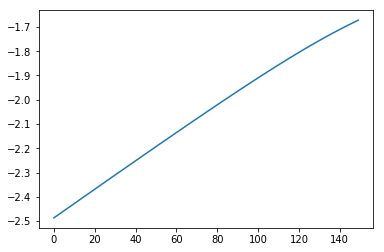

In [10]:
loss = []
acc = []

W = np.array([0.5, 0.5])
b = 4.21
n_iters = 150
for ix in range(n_iters):
    ## Complete the interpretation method here
    ## 1. Initialise w, b
    ## 2. Run Optimizer in loss
    ## 3. Log accuracy and loss
    ## 4. Plot the curves
    err, W, b = optimizer(X_train, W, y_train, b, learning_rate=0.01)
    loss.append(err)

plt.plot(loss)
plt.show()

[1.15174196 2.42170389]


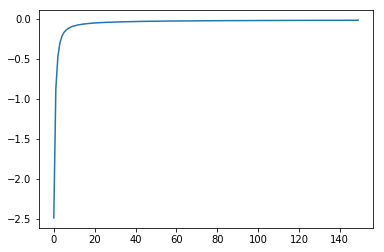

In [11]:
loss = []
acc = []

W = np.array([0.5, 0.5])
b = 4.21
n_iters = 150
for ix in range(n_iters):
    ## Complete the interpretation method here
    ## 1. Initialise w, b
    ## 2. Run Optimizer in loss
    ## 3. Log accuracy and loss
    ## 4. Plot the curves
    err, W, b = stochastic_optimizer(X_train, W, y_train, b, learning_rate=0.01)
    loss.append(err)
print(W)

plt.plot(loss)
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
lr.score(X_test, y_test)

0.9942857142857143

In [29]:
from keras.models import Sequential

In [30]:
lgs_model=Sequential()

In [31]:
from keras.layers import Dense

In [32]:
lgs_model.add(Dense(units=512 , activation= 'relu',input_dim=2))
lgs_model.add(Dense(units=256 , activation = 'relu'))
lgs_model.add(Dense(units=128 , activation = 'relu'))
lgs_model.add(Dense(units=16 , activation='relu'))
lgs_model.add(Dense(units=1 , activation='sigmoid'))


In [33]:
lgs_model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])


In [35]:
lgs_model.fit(X_train,y_train,epochs=300)


Epoch 1/300
650/650 [==============================] - 0s 143us/step - loss: 0.5093 - acc: 0.7815
Epoch 2/300
650/650 [==============================] - 0s 101us/step - loss: 0.4380 - acc: 0.8077
Epoch 3/300
650/650 [==============================] - 0s 96us/step - loss: 0.3912 - acc: 0.8385
Epoch 4/300
650/650 [==============================] - 0s 118us/step - loss: 0.3507 - acc: 0.8831
Epoch 5/300
650/650 [==============================] - 0s 102us/step - loss: 0.3116 - acc: 0.9292
Epoch 6/300
650/650 [==============================] - 0s 106us/step - loss: 0.2767 - acc: 0.9585
Epoch 7/300
650/650 [==============================] - 0s 109us/step - loss: 0.2460 - acc: 0.9646
Epoch 8/300
650/650 [==============================] - 0s 111us/step - loss: 0.2201 - acc: 0.9800
Epoch 9/300
650/650 [==============================] - 0s 115us/step - loss: 0.1968 - acc: 0.9831
Epoch 10/300
650/650 [==============================] - 0s 100us/step - loss: 0.1769 - acc: 0.9862
Epoch 11/300
650/650

650/650 [==============================] - 0s 132us/step - loss: 0.0124 - acc: 0.9969
Epoch 84/300
650/650 [==============================] - 0s 131us/step - loss: 0.0125 - acc: 0.9969
Epoch 85/300
650/650 [==============================] - 0s 142us/step - loss: 0.0121 - acc: 0.9969
Epoch 86/300
650/650 [==============================] - 0s 111us/step - loss: 0.0122 - acc: 0.9969
Epoch 87/300
650/650 [==============================] - 0s 95us/step - loss: 0.0116 - acc: 0.9985
Epoch 88/300
650/650 [==============================] - 0s 109us/step - loss: 0.0116 - acc: 0.9969
Epoch 89/300
650/650 [==============================] - 0s 102us/step - loss: 0.0119 - acc: 0.9969
Epoch 90/300
650/650 [==============================] - 0s 96us/step - loss: 0.0115 - acc: 0.9969
Epoch 91/300
650/650 [==============================] - 0s 93us/step - loss: 0.0114 - acc: 0.9969
Epoch 92/300
650/650 [==============================] - 0s 109us/step - loss: 0.0112 - acc: 0.9969
Epoch 93/300
650/650 [====

650/650 [==============================] - 0s 121us/step - loss: 0.0084 - acc: 0.9969
Epoch 166/300
650/650 [==============================] - 0s 104us/step - loss: 0.0083 - acc: 0.9969
Epoch 167/300
650/650 [==============================] - 0s 107us/step - loss: 0.0082 - acc: 0.9969
Epoch 168/300
650/650 [==============================] - 0s 99us/step - loss: 0.0085 - acc: 0.9969
Epoch 169/300
650/650 [==============================] - 0s 104us/step - loss: 0.0082 - acc: 0.9969
Epoch 170/300
650/650 [==============================] - 0s 105us/step - loss: 0.0082 - acc: 0.9985
Epoch 171/300
650/650 [==============================] - 0s 89us/step - loss: 0.0078 - acc: 0.9985
Epoch 172/300
650/650 [==============================] - 0s 96us/step - loss: 0.0083 - acc: 0.9969
Epoch 173/300
650/650 [==============================] - 0s 104us/step - loss: 0.0081 - acc: 0.9969
Epoch 174/300
650/650 [==============================] - 0s 104us/step - loss: 0.0083 - acc: 0.9969
Epoch 175/300
650

650/650 [==============================] - 0s 125us/step - loss: 0.0075 - acc: 0.9969
Epoch 248/300
650/650 [==============================] - 0s 146us/step - loss: 0.0072 - acc: 0.9969
Epoch 249/300
650/650 [==============================] - 0s 135us/step - loss: 0.0074 - acc: 0.9969
Epoch 250/300
650/650 [==============================] - 0s 133us/step - loss: 0.0072 - acc: 0.9969
Epoch 251/300
650/650 [==============================] - 0s 124us/step - loss: 0.0095 - acc: 0.9969
Epoch 252/300
650/650 [==============================] - 0s 103us/step - loss: 0.0074 - acc: 0.9969
Epoch 253/300
650/650 [==============================] - 0s 91us/step - loss: 0.0072 - acc: 0.9969
Epoch 254/300
650/650 [==============================] - 0s 90us/step - loss: 0.0065 - acc: 0.9969
Epoch 255/300
650/650 [==============================] - 0s 89us/step - loss: 0.0067 - acc: 0.9969
Epoch 256/300
650/650 [==============================] - 0s 157us/step - loss: 0.0071 - acc: 0.9969
Epoch 257/300
650

In [38]:
loss=lgs_model.evaluate(X_test,y_test)
print(loss)

350/350 [==============================] - 0s 69us/step
[0.01723050335156066, 0.9942857142857143]


In [43]:
prd=lgs_model.predict(X_test)
print(prd)

[[1.49404266e-04]
 [4.21768840e-04]
 [9.99963880e-01]
 [2.74285965e-04]
 [2.10598926e-04]
 [2.07611520e-04]
 [9.99927878e-01]
 [9.99999166e-01]
 [1.52643042e-05]
 [9.99966979e-01]
 [9.99202073e-01]
 [1.13318965e-04]
 [2.73445094e-05]
 [9.99999881e-01]
 [9.99923229e-01]
 [1.01237329e-05]
 [9.89222972e-05]
 [7.86749661e-01]
 [9.94247317e-01]
 [1.05492650e-02]
 [1.91269297e-04]
 [1.24386555e-04]
 [9.99885678e-01]
 [1.96682726e-04]
 [9.99922872e-01]
 [9.99968171e-01]
 [2.39669830e-02]
 [9.99988079e-01]
 [9.99902010e-01]
 [1.67811086e-04]
 [3.39432183e-04]
 [9.99989033e-01]
 [3.49854759e-04]
 [1.74161294e-04]
 [9.99992967e-01]
 [9.99997258e-01]
 [9.99515057e-01]
 [9.99514103e-01]
 [6.21330051e-04]
 [2.47898977e-04]
 [3.19112842e-05]
 [6.62631792e-05]
 [1.23161473e-04]
 [3.24281427e-06]
 [1.36483693e-04]
 [9.99967337e-01]
 [9.97522295e-01]
 [9.99781668e-01]
 [3.77634645e-01]
 [9.99891996e-01]
 [1.71614738e-04]
 [8.76022605e-05]
 [9.43050312e-04]
 [8.58791973e-05]
 [9.99987602e-01]
 [6.046716